# Visualization Notebook

This notebook produces all visualizations for the WiFi localization results.

**Prerequisites:** Run RUNNER.ipynb first to generate the results data and save them to `data/results/`.

## Setup and Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [15]:
from code_resources.Visualizations_Functions import (
    plot_ap_importance,
    plot_redundancy_matrix,
    plot_error_comparison, 
    plot_floor_accuracy_comparison, 
    plot_error_range_comparison, 
    plot_radar_chart, 
    plot_combined_error_and_accuracy,
    plot_building_fingerprints_3d,
    plot_building_comparison_3d
)
from code_resources.data_loaders import load_preprocessed_data, load_all_precomputed_data
from code_resources.ML_post_processing import train_regressor
from code_resources import pre_processing

# Load All Data

This section loads all required data for the visualizations.

In [16]:
# 1. Load system parameters
print("=" * 60)
print("LOADING SYSTEM PARAMETERS")
print("=" * 60)

system_params_path = Path('data') / 'system_input' / 'system_parameters.csv'
system_params_df = pd.read_csv(system_params_path)

# Convert to dictionary for easy access
system_params_dict = dict(zip(system_params_df['Parameter'], system_params_df['Value']))

# Extract normalization parameters
LON_MIN = system_params_dict['LON_MIN']
LON_MAX = system_params_dict['LON_MAX']
LAT_MIN = system_params_dict['LAT_MIN']
LAT_MAX = system_params_dict['LAT_MAX']
FLOOR_HEIGHT = system_params_dict['FLOOR_HEIGHT']
building_id = int(system_params_dict['BUILDING_ID'])

print(f"\n✓ Loaded system parameters from: {system_params_path}")
print(f"  LON_MIN: {LON_MIN}")
print(f"  LON_MAX: {LON_MAX}")
print(f"  LAT_MIN: {LAT_MIN}")
print(f"  LAT_MAX: {LAT_MAX}")
print(f"  FLOOR_HEIGHT: {FLOOR_HEIGHT}")
print(f"  BUILDING_ID: {building_id}")

LOADING SYSTEM PARAMETERS

✓ Loaded system parameters from: data\system_input\system_parameters.csv
  LON_MIN: -7578.46197155118
  LON_MAX: -7404.491683006287
  LAT_MIN: 4864809.458700001
  LAT_MAX: 4864959.505251184
  FLOOR_HEIGHT: 3.0
  BUILDING_ID: 1


In [17]:
# 2. Load preprocessed training and validation data
print("\n" + "=" * 60)
print("LOADING PREPROCESSED DATA")
print("=" * 60)

rssi_train, coords_train, rssi_val, coords_val = load_preprocessed_data(building_id)

print(f"\n✓ Data loaded successfully!")
print(f"  Training set: {rssi_train.shape[0]} samples, {rssi_train.shape[1]} APs")
print(f"  Training coordinates: {coords_train.shape}")
print(f"  Validation set: {rssi_val.shape[0]} samples, {rssi_val.shape[1]} APs")
print(f"  Validation coordinates: {coords_val.shape}")


LOADING PREPROCESSED DATA
✓ Loaded preprocessed data from pickle: data\output_data\preprocessed_data\preprocessed_building_1.pkl
  Training samples: 5196
  Validation samples: 307
  Number of APs: 520


ValueError: too many values to unpack (expected 4)

In [ ]:
# 3. Load QUBO results from RUNNER.ipynb
print("\n" + "=" * 60)
print("LOADING QUBO RESULTS")
print("=" * 60)

results_dir = Path('data') / 'results'
results_file = results_dir / 'qubo_results.xlsx'

if not results_file.exists():
    raise FileNotFoundError(f"Results file not found: {results_file}. Please run RUNNER.ipynb first.")

print(f"Loading results from: {results_file}")
results_df = pd.read_excel(results_file)
print(f"\n✓ Loaded results for {len(results_df)} methods")
print(results_df)

## Importance Scores Visualizations

In [ ]:
# 4. Convert results to dictionary format
results = {}
for _, row in results_df.iterrows():
    method = row['Importance_Method']
    results[method] = {
        'selected_aps': row['Selected_APs'].split(', '),
        'mean_3d_error': row['Mean_3D_Error_m'],
        'median_3d_error': row['Median_3D_Error_m'],
        'real_min_m': row['Min_Error_m'],
        'real_max_m': row['Max_Error_m'],
        'floor_accuracy': row['Floor_Accuracy'],
        'duration': row['QUBO_Duration_s']
    }

# Extract number of APs selected
k = len(results[list(results.keys())[0]]['selected_aps'])

print("\n✓ Converted to dictionary format:")
for method, metrics in results.items():
    print(f"  - {method}: {len(metrics['selected_aps'])} APs, Mean Error: {metrics['mean_3d_error']:.2f}m")
print(f"\nNumber of APs selected (k): {k}")

In [6]:
# Load importance scores and redundancy matrix for visualization
print("Loading importance scores and redundancy matrix...")
importance_dicts, redundancy_matrix = load_all_precomputed_data()
print("✓ Data loaded successfully")

Loading importance scores and redundancy matrix...
Loading pre-computed importance scores and redundancy matrix

Loading importance scores...
✓ Loaded 520 APs for entropy importance
✓ Loaded 520 APs for average importance
✓ Loaded 520 APs for median importance
✓ Loaded 520 APs for max importance
✓ Loaded 520 APs for variance importance
✓ Loaded 520 APs for mutual_info importance

Loading redundancy matrix...
✓ Loaded redundancy matrix with shape: (520, 520)

✓ All data loaded successfully!
✓ Data loaded successfully



Visualizing redundancy (correlation) matrix...
Filtering to show only APs with non-zero mutual information importance...
Filtered to 207 APs with non-zero importance (from 520 total APs)


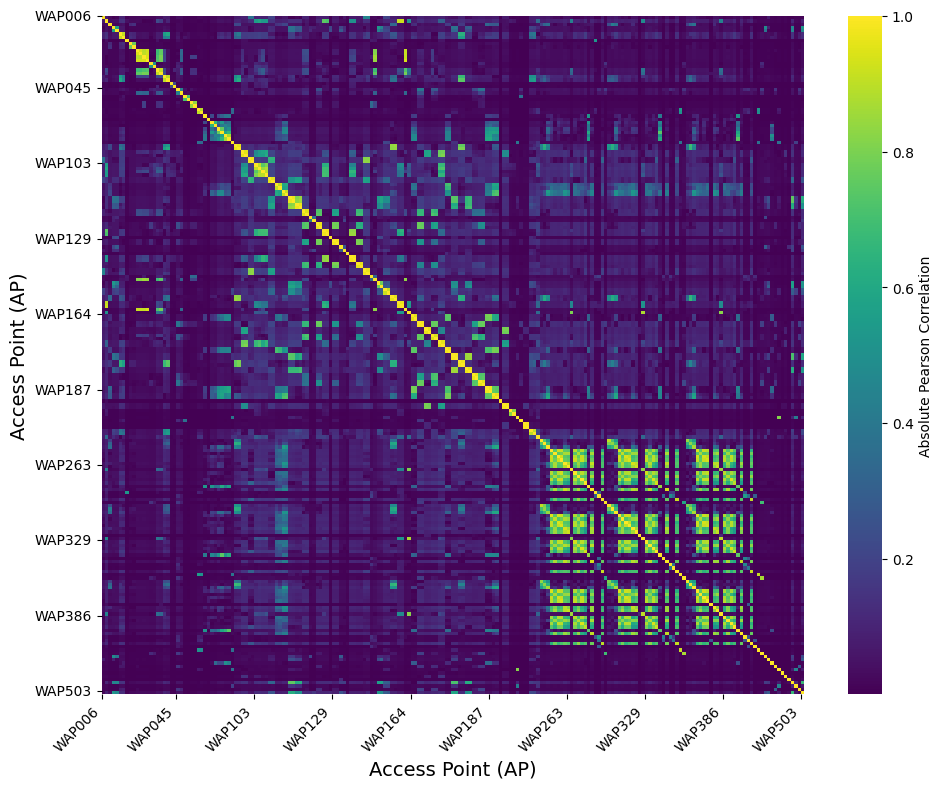

In [7]:
# Plot redundancy matrix heatmap (filtered by non-zero mutual info importance)
print("\nVisualizing redundancy (correlation) matrix...")
print("Filtering to show only APs with non-zero mutual information importance...")
plot_redundancy_matrix(redundancy_matrix, importance_dict=importance_dicts['mutual_info'])


Visualizing importance scores for each method...

Plotting mutual_info importance scores...


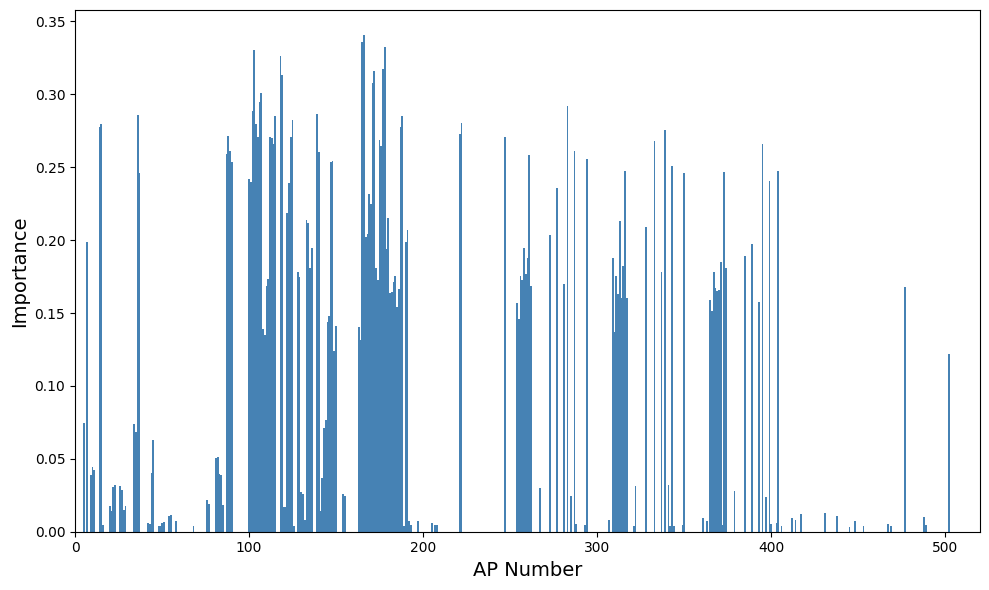

Plotting entropy importance scores...


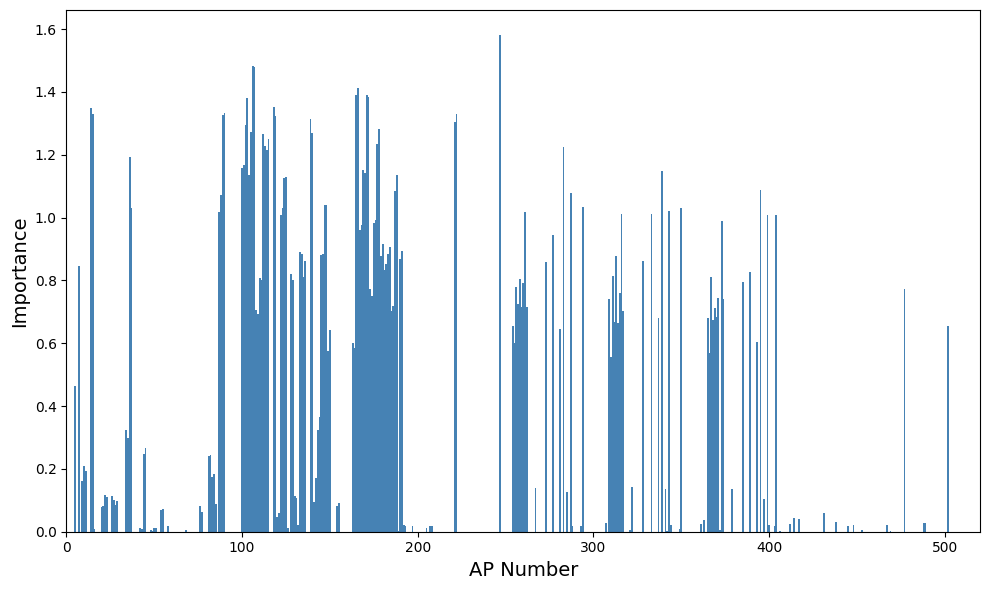

Plotting average importance scores...


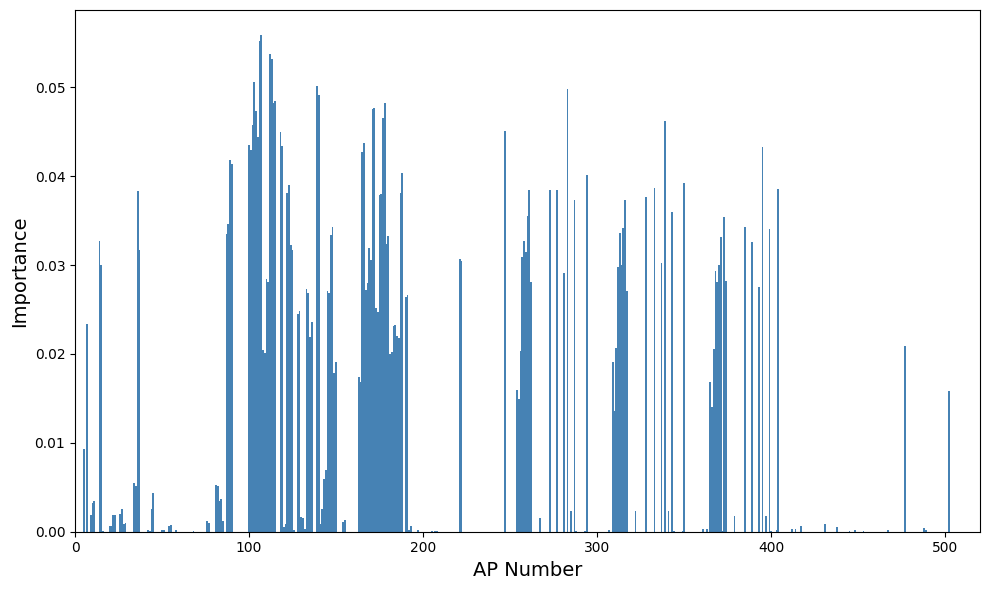

Plotting max importance scores...


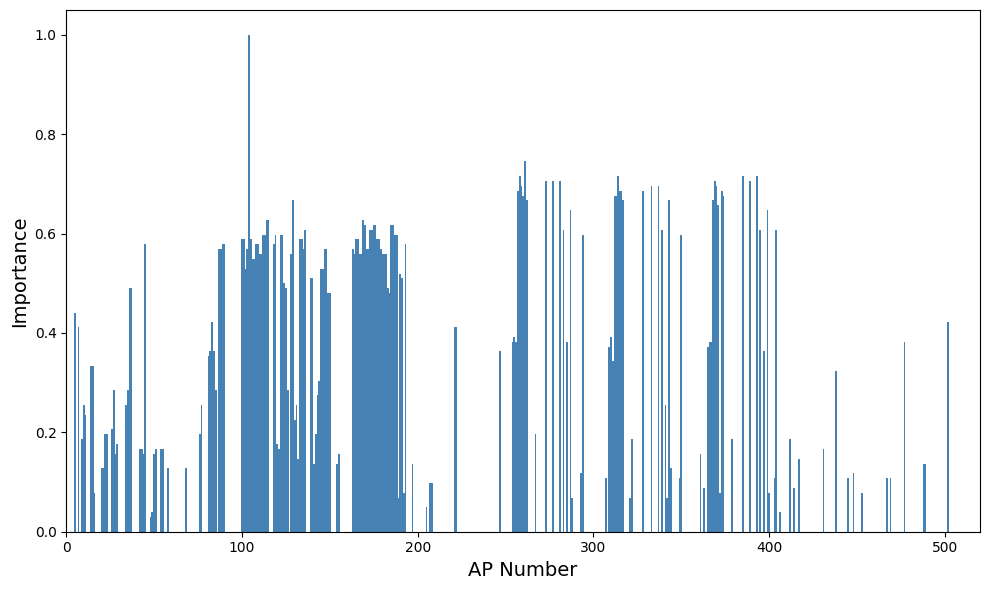

Plotting variance importance scores...


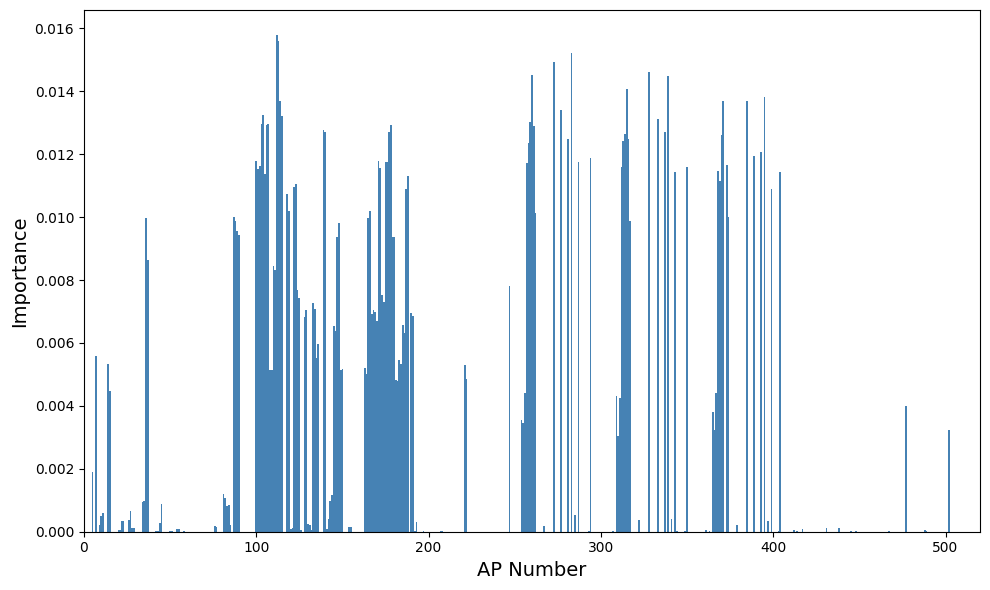

In [8]:
# Plot importance scores for each method
print("\nVisualizing importance scores for each method...\n")

for label in ['mutual_info', 'entropy', 'average', 'max', 'variance']:
    print(f"Plotting {label} importance scores...")
    plot_ap_importance(importance_dicts[label])

## 2D Comparison Plots

These plots compare the performance of different importance methods.

Plotting error comparison...


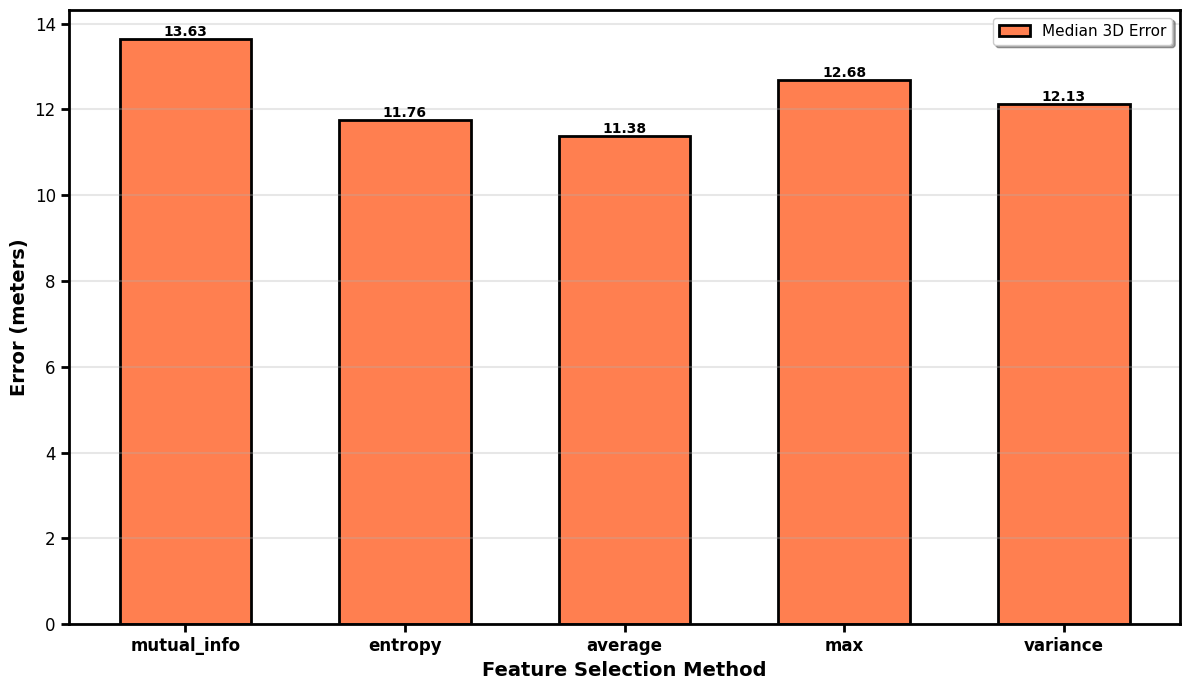

In [15]:
# Plot error comparison (median 3D error)
print("Plotting error comparison...")
plot_error_comparison(results)

# Plot floor accuracy comparison
print("Plotting floor accuracy comparison...")
plot_floor_accuracy_comparison(results)

Plotting error range comparison...


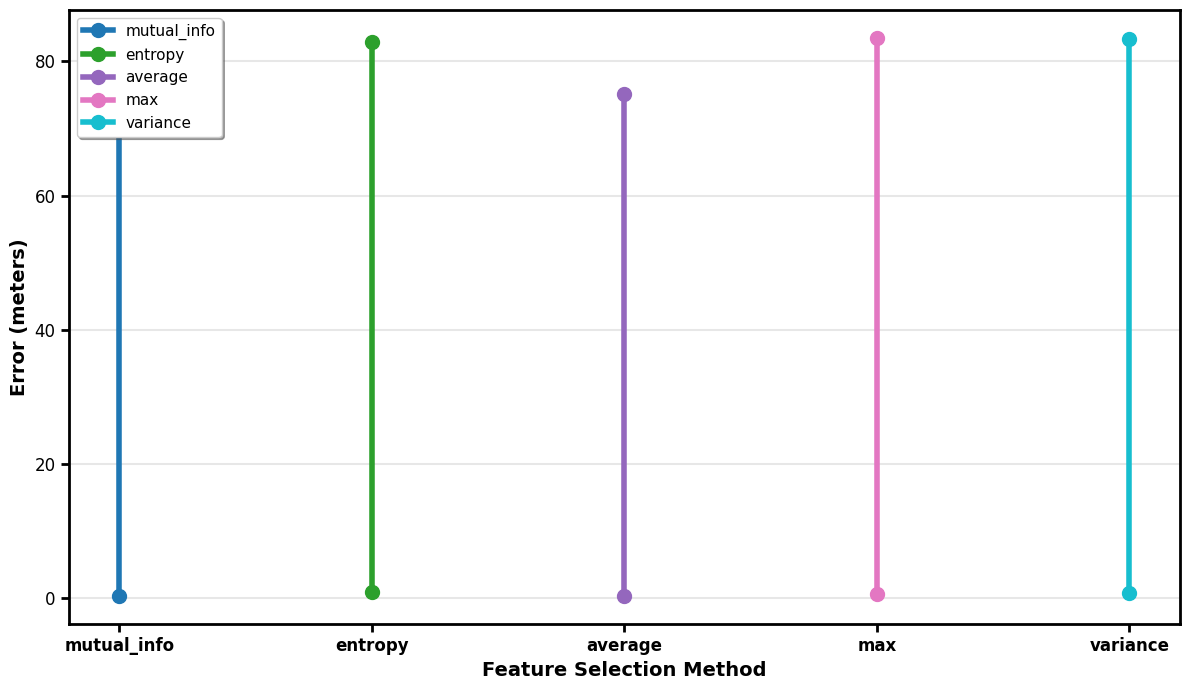

In [7]:
# Plot error range comparison
print("Plotting error range comparison...")
plot_error_range_comparison(results)

Plotting radar chart...


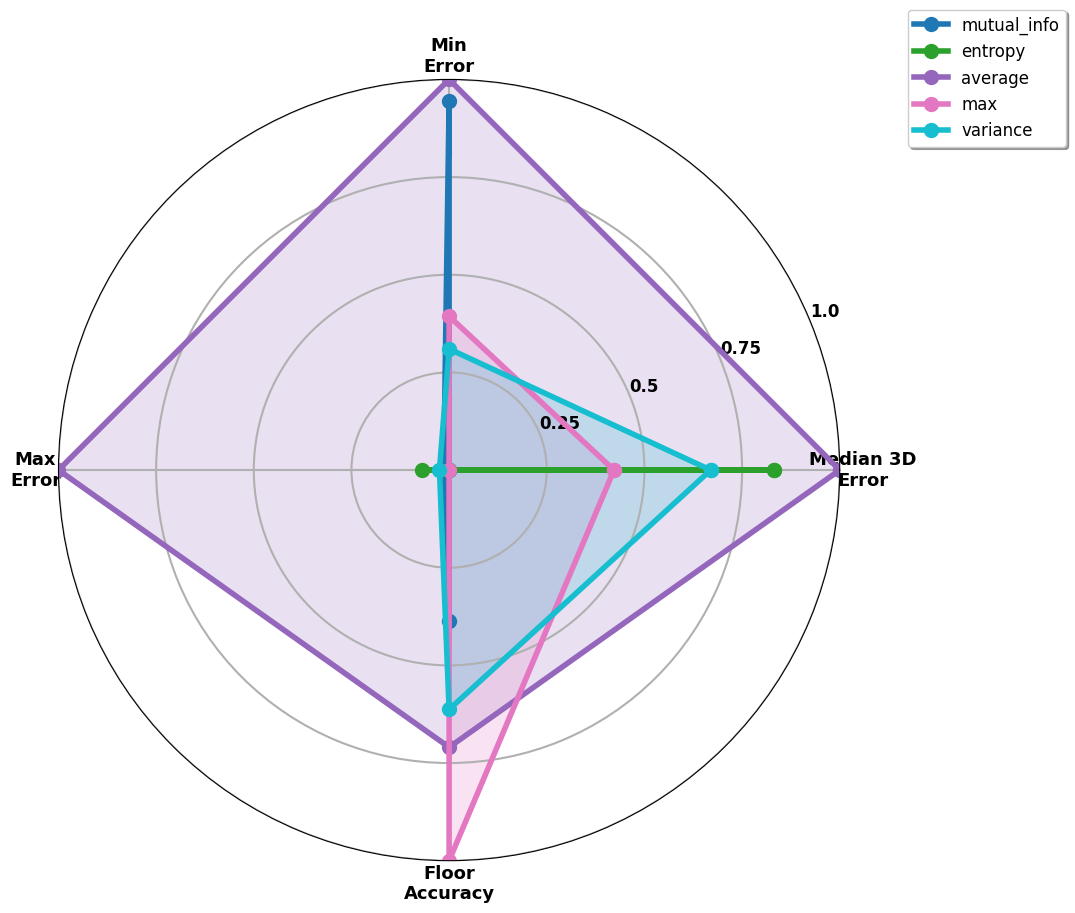

In [8]:
# Plot radar chart
print("Plotting radar chart...")
plot_radar_chart(results)

Plotting combined error and accuracy...


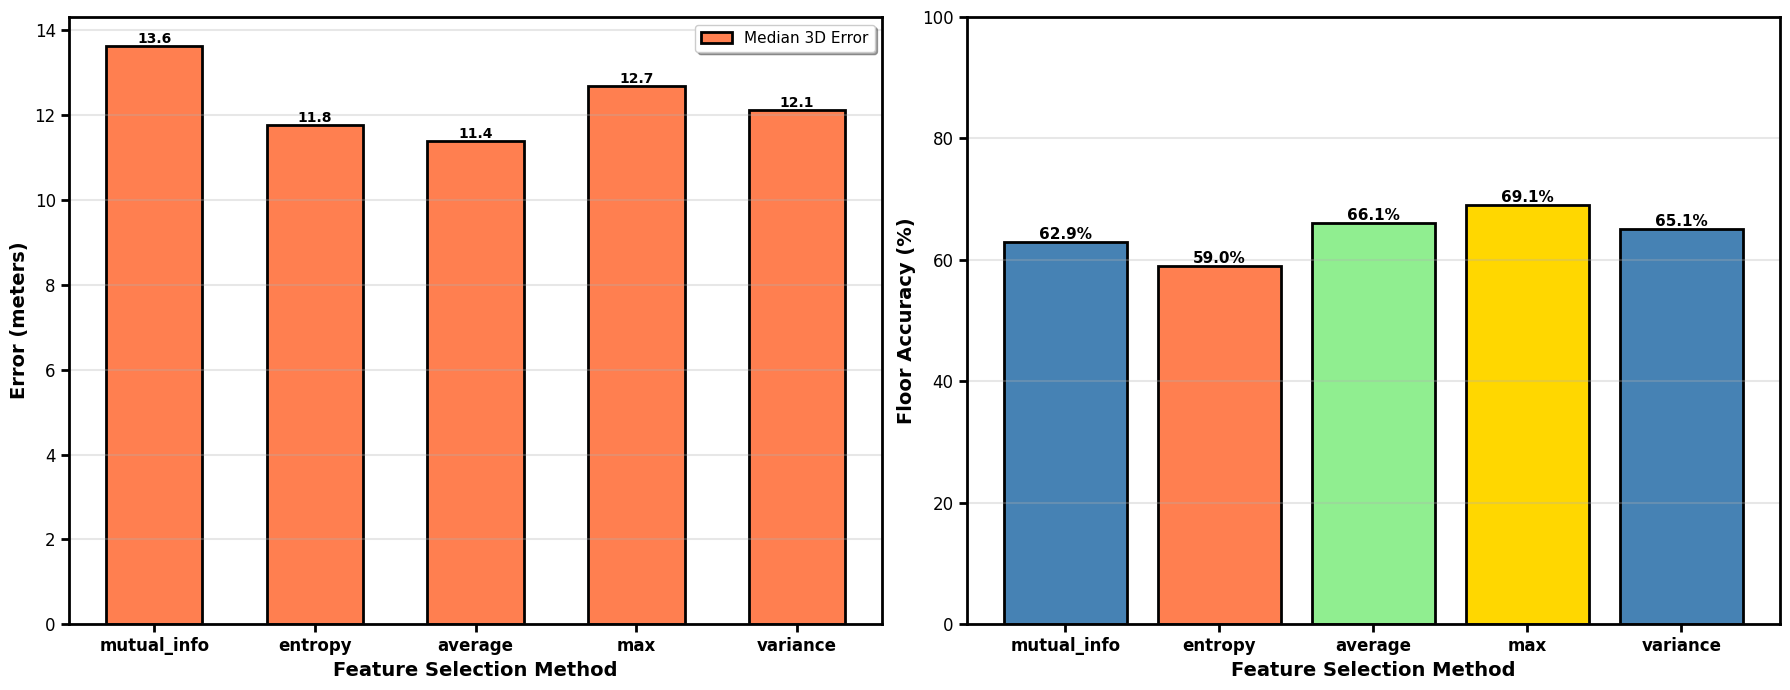

In [18]:
# Plot combined error and accuracy
print("Plotting combined error and accuracy...")
plot_combined_error_and_accuracy(results)

## 3D Visualizations

Load preprocessed data for 3D visualizations of building fingerprints and predictions.

In [13]:
# Load system parameters from CSV
print("Loading system parameters and preprocessed data for 3D visualizations...")

system_params_path = Path('data') / 'system_input' / 'system_parameters.csv'
system_params_df = pd.read_csv(system_params_path)

# Convert to dictionary for easy access
system_params_dict = dict(zip(system_params_df['Parameter'], system_params_df['Value']))

# Extract normalization parameters
LON_MIN = system_params_dict['LON_MIN']
LON_MAX = system_params_dict['LON_MAX']
LAT_MIN = system_params_dict['LAT_MIN']
LAT_MAX = system_params_dict['LAT_MAX']
FLOOR_HEIGHT = system_params_dict['FLOOR_HEIGHT']
building_id = int(system_params_dict['BUILDING_ID'])

print(f"\n✓ Loaded system parameters from: {system_params_path}")
print(f"  LON_MIN: {LON_MIN}")
print(f"  LON_MAX: {LON_MAX}")
print(f"  LAT_MIN: {LAT_MIN}")
print(f"  LAT_MAX: {LAT_MAX}")
print(f"  FLOOR_HEIGHT: {FLOOR_HEIGHT}")
print(f"  BUILDING_ID: {building_id}")

# Load preprocessed data (train and validation sets)
print("\nLoading preprocessed training and validation data...")
rssi_train, coords_train, rssi_val, coords_val = load_preprocessed_data()

print(f"\n✓ Data loaded successfully!")
print(f"  Training set: {rssi_train.shape[0]} samples, {rssi_train.shape[1]} APs")
print(f"  Training coordinates: {coords_train.shape}")
print(f"  Validation set: {rssi_val.shape[0]} samples, {rssi_val.shape[1]} APs")
print(f"  Validation coordinates: {coords_val.shape}")

Loading system parameters and preprocessed data for 3D visualizations...

✓ Loaded system parameters from: data\system_input\system_parameters.csv
  LON_MIN: -7578.46197155118
  LON_MAX: -7404.491683006287
  LAT_MIN: 4864809.458700001
  LAT_MAX: 4864959.505251184
  FLOOR_HEIGHT: 3.0
  BUILDING_ID: 1

Loading preprocessed training and validation data...


TypeError: load_preprocessed_data() missing 1 required positional argument: 'building_id'

### 3D Building Fingerprints

Visualize the WiFi fingerprints in 3D space.

In [9]:
# Note: The 'results' dictionary already contains selected APs from loading the Excel file
# We can use it directly for 3D visualizations

print(f"✓ Results dictionary contains {len(results)} methods with selected APs")
for method in results.keys():
    print(f"  - {method}: {len(results[method]['selected_aps'])} APs")

✓ Results dictionary contains 5 methods with selected APs
  - mutual_info: 20 APs
  - entropy: 20 APs
  - average: 20 APs
  - max: 20 APs
  - variance: 20 APs


## 3D Visualization - Building Fingerprints

In [10]:
# Plot training data fingerprints in 3D - colored by floor
print("Visualizing training fingerprints (colored by floor)...")
fig, ax = plot_building_fingerprints_3d(
    coords_train,
    color_by='floor',
    figsize=(14, 10),
    title='Building 1 - Training Fingerprints (Colored by Floor)',
    elev=25,
    azim=45,
    alpha=0.6,
    marker_size=30
)

Visualizing training fingerprints (colored by floor)...


NameError: name 'coords_train' is not defined

Visualizing validation fingerprints (colored by floor)...


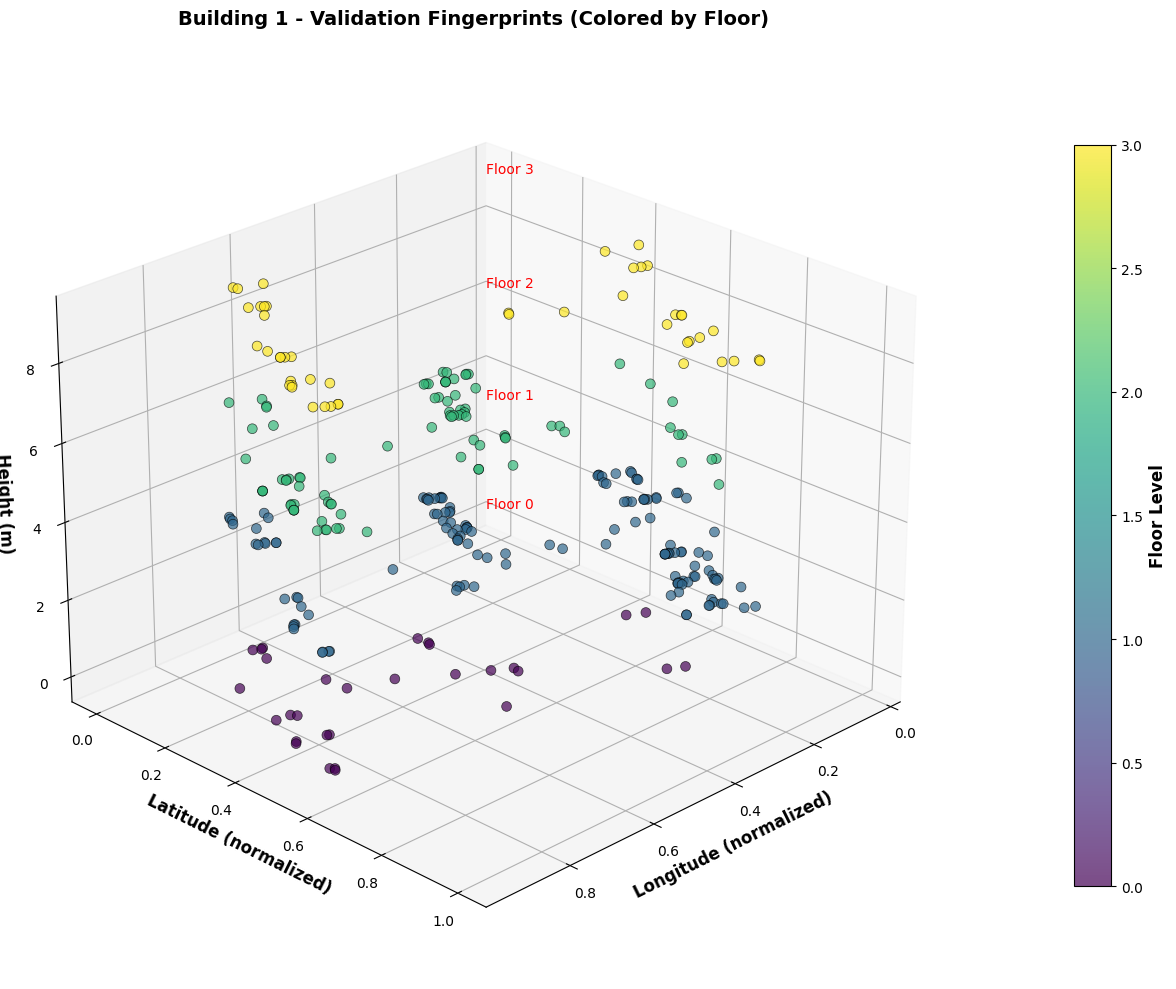

In [23]:
# Plot validation data fingerprints in 3D - colored by floor
print("Visualizing validation fingerprints (colored by floor)...")
fig, ax = plot_building_fingerprints_3d(
    coords_val,
    color_by='floor',
    figsize=(14, 10),
    title='Building 1 - Validation Fingerprints (Colored by Floor)',
    elev=25,
    azim=45,
    alpha=0.7,
    marker_size=50
)

Visualizing training fingerprints (colored by measurement density)...


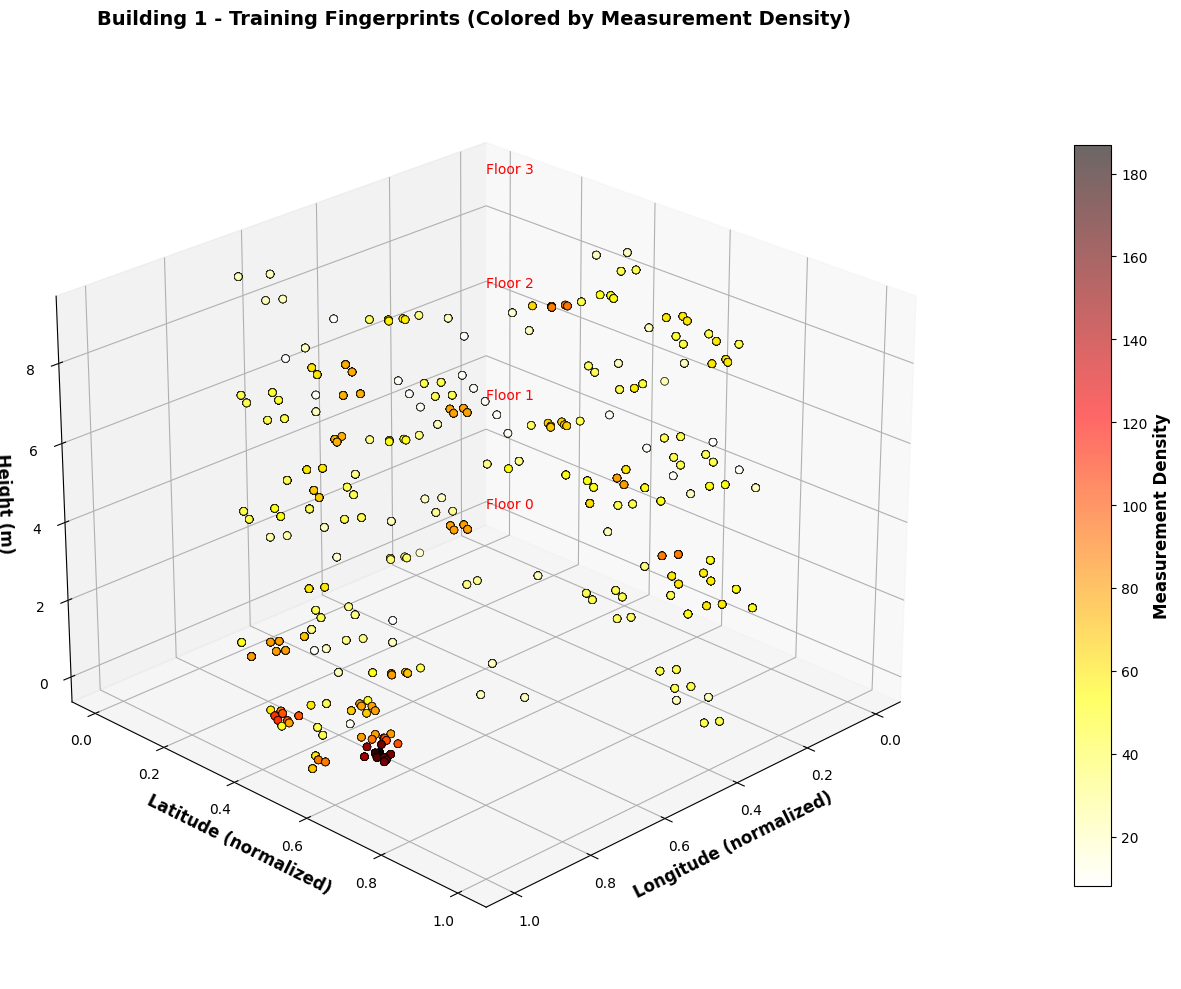

In [24]:
# Plot training data colored by measurement density
print("Visualizing training fingerprints (colored by measurement density)...")

fig, ax = plot_building_fingerprints_3d(
    coords_train,
    color_by='density',
    figsize=(14, 10),
    title='Building 1 - Training Fingerprints (Colored by Measurement Density)',
    elev=25,
    azim=45,
    alpha=0.6,
    marker_size=30
)

In [41]:
# Plot with denormalized coordinates (real-world scale in meters)
print("Visualizing training fingerprints with denormalized coordinates...")

fig, ax = plot_building_fingerprints_3d(
    coords_train,
    color_by='floor',
    denormalize=True,
    lon_min=LON_MIN,
    lon_max=LON_MAX,
    lat_min=LAT_MIN,
    lat_max=LAT_MAX,
    floor_height=FLOOR_HEIGHT,
    figsize=(14, 10),
    title='Building 1 - Training Fingerprints (Real-World Coordinates)',
    elev=25,
    azim=45,
    alpha=0.6,
    marker_size=30
)

Visualizing training fingerprints with denormalized coordinates...


NameError: name 'LON_MIN' is not defined

Visualizing training fingerprints (colored by RSSI of selected APs - mutual_info method)...


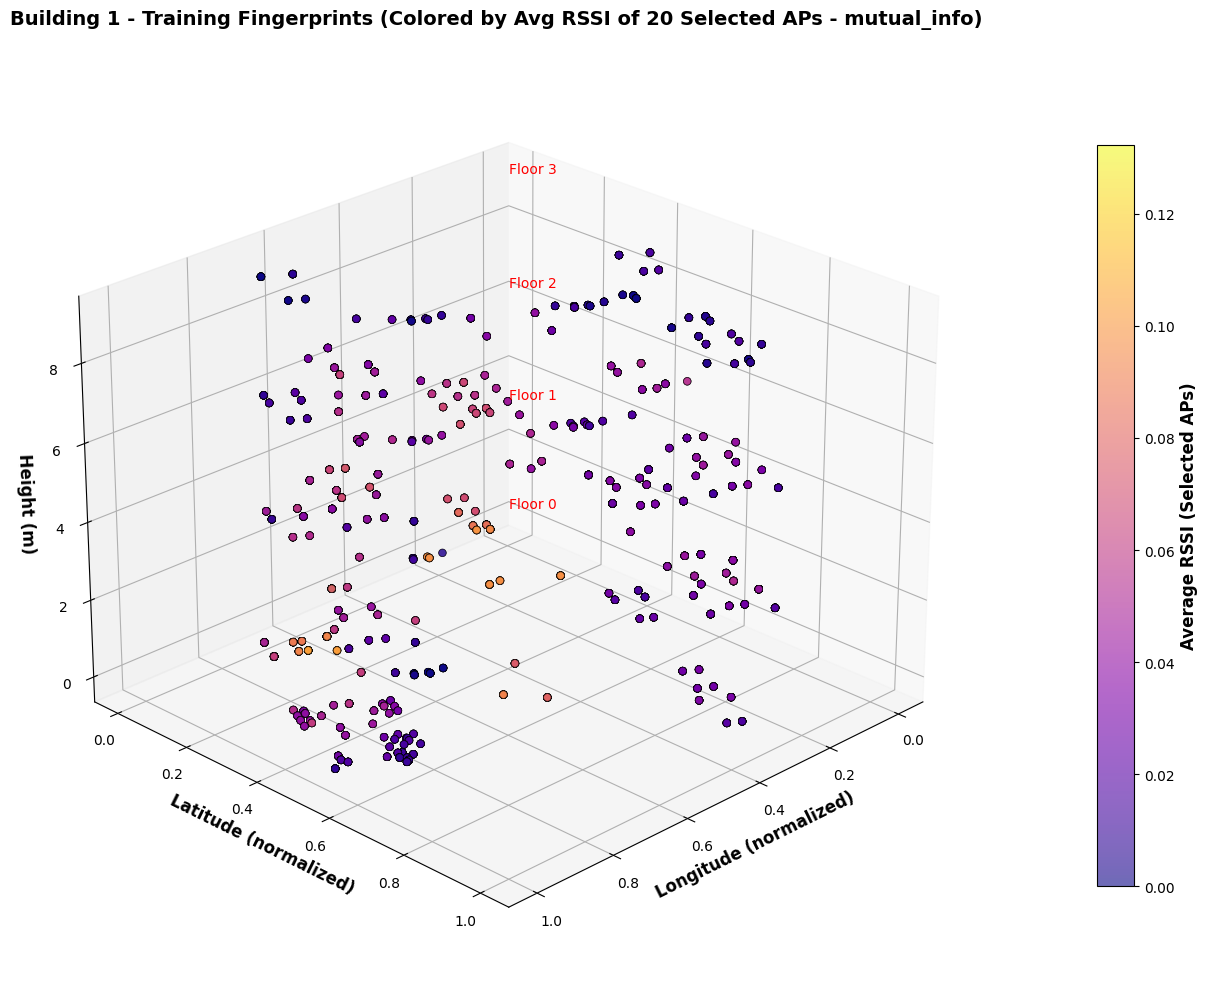

In [26]:
# Plot training data colored by RSSI strength of selected APs
# Using the first method available in results
first_method = list(results.keys())[0]
print(f"Visualizing training fingerprints (colored by RSSI of selected APs - {first_method} method)...")

selected_aps_first = results[first_method]['selected_aps']

fig, ax = plot_building_fingerprints_3d(
    coords_train,
    rssi_data=rssi_train,
    selected_aps=selected_aps_first,
    color_by='rssi',
    figsize=(14, 10),
    title=f'Building 1 - Training Fingerprints (Colored by Avg RSSI of {len(selected_aps_first)} Selected APs - {first_method})',
    elev=25,
    azim=45,
    alpha=0.6,
    marker_size=30
)

## 3D Visualization - True vs Predicted Comparisons

In [12]:
# Generate predictions for all methods and create 3D visualizations
output_viz_dir = Path('data') / 'output_data' / 'visualizations_3d'
output_viz_dir.mkdir(parents=True, exist_ok=True)

print("Comparing different importance methods in 3D...\n")

for method_name in results.keys():
    print(f"Generating 3D comparison for '{method_name}' method...")
    
    # Get predictions for this method
    selected_aps_method = results[method_name]['selected_aps']
    models_method, predictions_method = train_regressor(
        rssi_train, coords_train, 
        rssi_val, coords_val, 
        selected_aps_method
    )
    
    # Plot comparison
    fig, ax = plot_building_comparison_3d(
        coords_val,
        predictions_method['rf_val'],
        denormalize=True,
        lon_min=LON_MIN,
        lon_max=LON_MAX,
        lat_min=LAT_MIN,
        lat_max=LAT_MAX,
        floor_height=FLOOR_HEIGHT,
        max_points=300,
        figsize=(16, 10),
        title=f'Building 1 - {method_name.capitalize()} Method (k={k})',
        save_path=output_viz_dir / f'3d_comparison_{method_name}.png'
    )

print(f"\n✓ All 3D visualizations saved to: {output_viz_dir}")

Comparing different importance methods in 3D...

Generating 3D comparison for 'mutual_info' method...


NameError: name 'rssi_train' is not defined

In [28]:
# Plot best method in detail (select the method with lowest mean 3D error)
best_method = min(results.keys(), key=lambda m: results[m]['mean_3d_error'])
print(f"Best method by mean 3D error: {best_method} ({results[best_method]['mean_3d_error']:.2f}m)")

selected_aps_best = results[best_method]['selected_aps']
models_best, predictions_best = train_regressor(
    rssi_train, coords_train, 
    rssi_val, coords_val, 
    selected_aps_best
)

preds_val = predictions_best['rf_val']

print(f"Using {len(selected_aps_best)} selected APs from '{best_method}' importance method")
print(f"True coordinates shape: {coords_val.shape}")
print(f"Predicted coordinates shape: {preds_val.shape}")

Best method by mean 3D error: average (15.14m)
Training random forest regressor...
✓ Enhanced Random Forest trained
   Average OOB Score: 0.9298
Using 20 selected APs from 'average' importance method
True coordinates shape: (307, 3)
Predicted coordinates shape: (307, 3)


Plotting true vs predicted locations (normalized coordinates)...


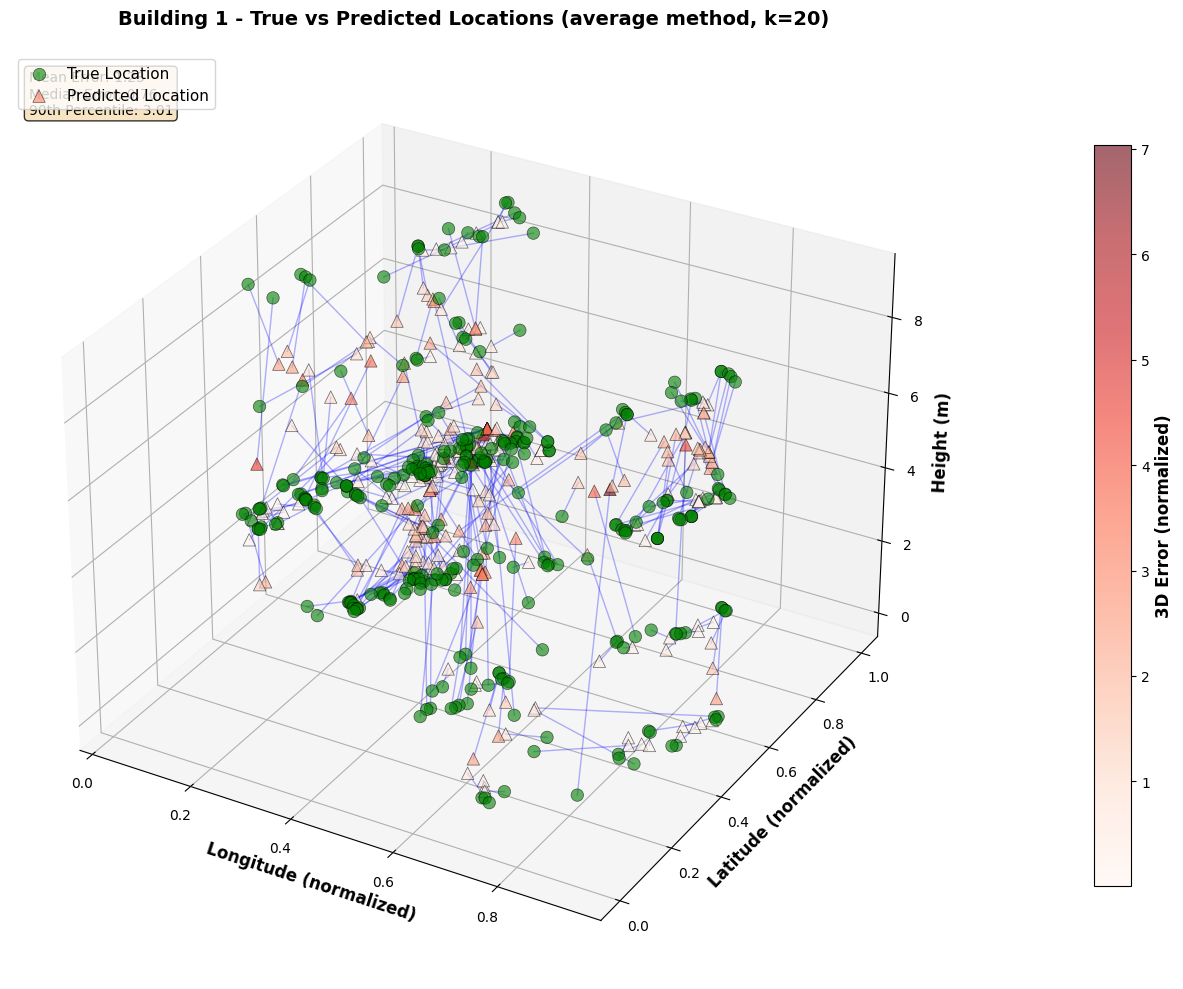

In [29]:
# Plot true vs predicted locations in 3D (normalized coordinates)
print("Plotting true vs predicted locations (normalized coordinates)...")

fig, ax = plot_building_comparison_3d(
    coords_val,
    preds_val,
    denormalize=False,
    max_points=500,
    figsize=(16, 10),
    title=f'Building 1 - True vs Predicted Locations ({best_method} method, k={k})'
)

In [11]:
# Plot true vs predicted locations in 3D (denormalized - real-world coordinates)
print("Plotting true vs predicted locations (real-world coordinates in meters)...")

fig, ax = plot_building_comparison_3d(
    coords_val,
    preds_val,
    denormalize=True,
    lon_min=LON_MIN,
    lon_max=LON_MAX,
    lat_min=LAT_MIN,
    lat_max=LAT_MAX,
    floor_height=FLOOR_HEIGHT,
    max_points=500,
    figsize=(16, 10),
    title=f'Building 1 - True vs Predicted (Real-World Scale, {best_method} method, k={k})'
)

Plotting true vs predicted locations (real-world coordinates in meters)...


NameError: name 'coords_val' is not defined

## Save All Visualizations

Optionally save all 2D plots to files for use in papers/presentations.

Saving 2D visualizations...

- Saving error comparison...


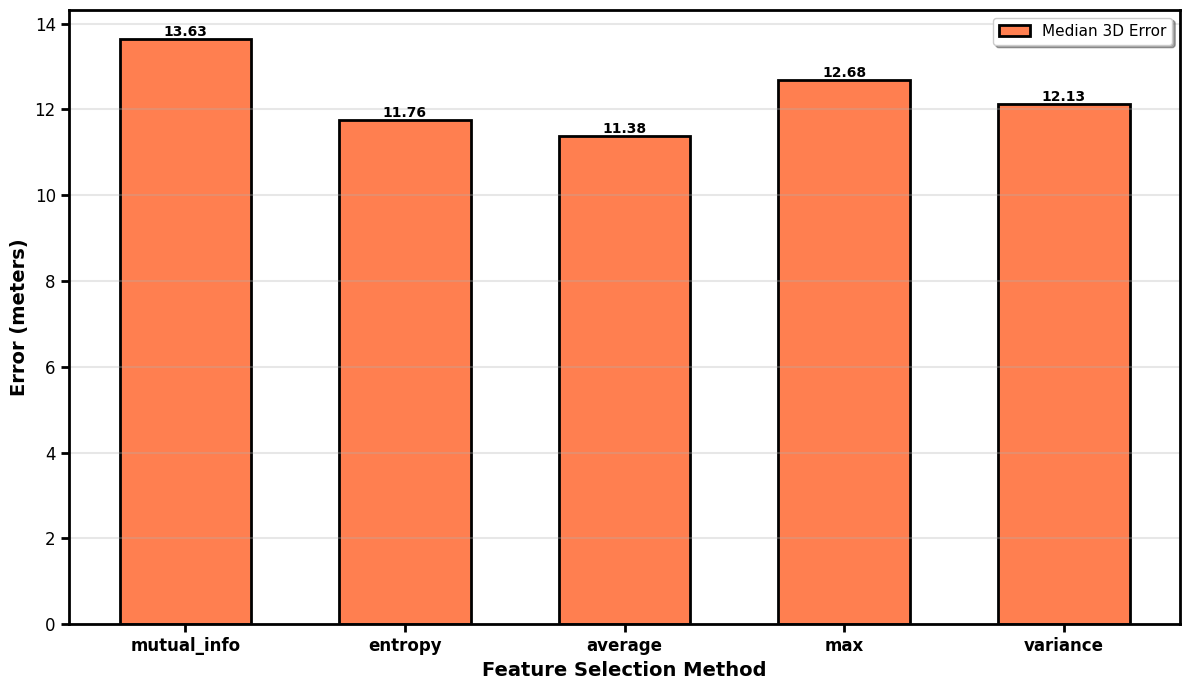

- Saving floor accuracy comparison...


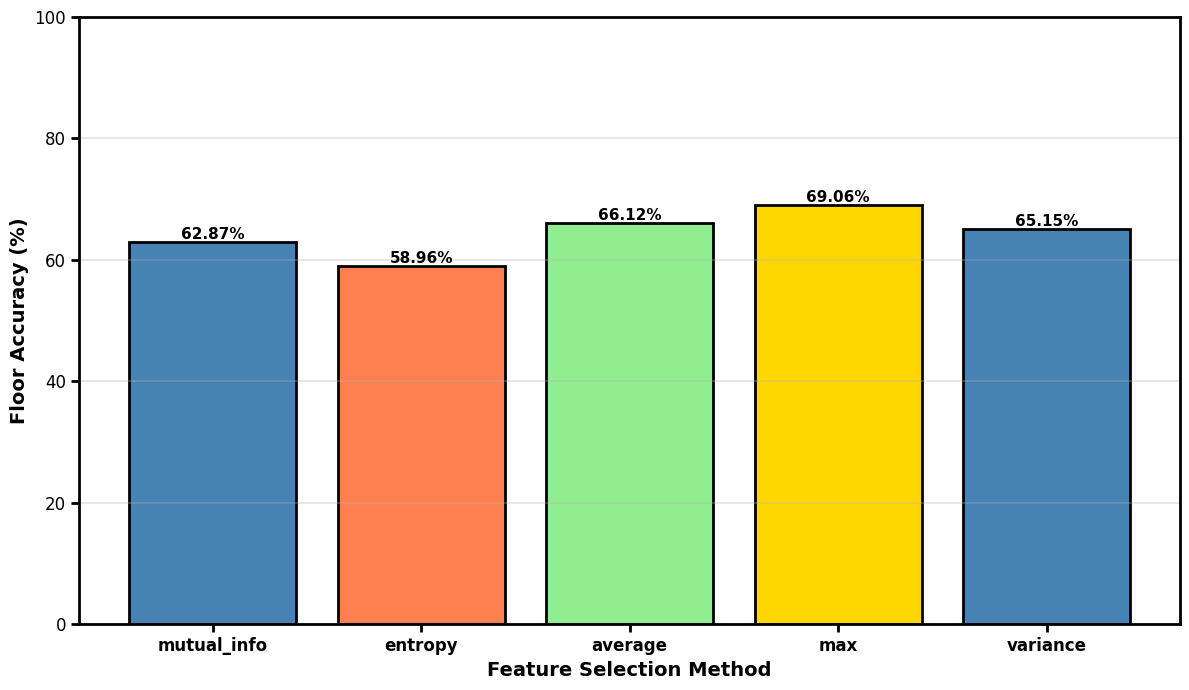

- Saving error range comparison...


IndexError: list index out of range

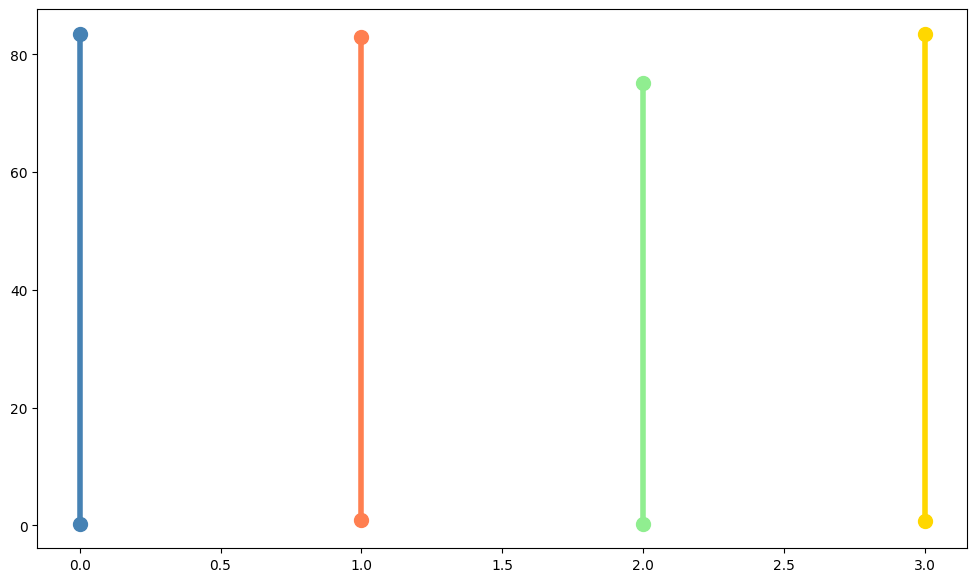

In [31]:
# Create output directory for 2D plots
output_2d_dir = Path('data') / 'output_data' / 'visualizations_2d'
output_2d_dir.mkdir(parents=True, exist_ok=True)

print("Saving 2D visualizations...\n")

# Error comparison
print("- Saving error comparison...")
plot_error_comparison(results, save_path=output_2d_dir / 'error_comparison.png')

# Floor accuracy comparison
print("- Saving floor accuracy comparison...")
plot_floor_accuracy_comparison(results, save_path=output_2d_dir / 'floor_accuracy_comparison.png')

# Error range comparison
print("- Saving error range comparison...")
plot_error_range_comparison(results, save_path=output_2d_dir / 'error_range_comparison.png')

# Radar chart
print("- Saving radar chart...")
plot_radar_chart(results, save_path=output_2d_dir / 'radar_chart.png')

# Combined error and accuracy
print("- Saving combined error and accuracy...")
plot_combined_error_and_accuracy(results, save_path=output_2d_dir / 'combined_error_accuracy.png')

print(f"\n✓ All 2D visualizations saved to: {output_2d_dir}")

## Summary

This notebook has generated:

**Importance Scores Visualizations:**
- Bar plots for 5 importance methods (mutual_info, entropy, average, max, variance)
- Redundancy matrix heatmap

**2D Results Comparison Plots:**
- Error comparison (median 3D error)
- Floor accuracy comparison
- Error range comparison (min to max)
- Radar chart (normalized metrics)
- Combined error and accuracy plot

**3D Visualizations:**
- Building fingerprints (colored by floor)
- Building fingerprints (colored by measurement density)
- Building fingerprints (real-world coordinates)
- Building fingerprints (colored by RSSI)
- True vs predicted comparisons for all methods
- Detailed true vs predicted for best method

**Output Locations:**
- 2D plots: `data/output_data/visualizations_2d/`
- 3D plots: `data/output_data/visualizations_3d/`